In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('gold_monthly_csv.csv')
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [4]:
data.shape

(847, 2)

In [10]:
print(f"Date range of gold Prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold Prices available from - 1950-01 to 2020-07


In [11]:
date = pd.date_range(start = '1/1/1950', end = '8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [17]:
df['month'] = date
df.drop('Date', axis=1)
df=df.set_index('month')
df

In [16]:
df

,Price,month
0,34.730,1950-01-31
1,34.730,1950-02-28
2,34.730,1950-03-31
3,34.730,1950-04-30
4,34.730,1950-05-31
...,...,...
842,1593.764,2020-03-31
843,1680.030,2020-04-30
844,1715.697,2020-05-31
845,1734.032,2020-06-30


In [18]:
df=df.set_index('month')
df

,Price
month,
1950-01-31,34.730
1950-02-28,34.730
1950-03-31,34.730
1950-04-30,34.730
1950-05-31,34.730
...,...
2020-03-31,1593.764
2020-04-30,1680.030
2020-05-31,1715.697


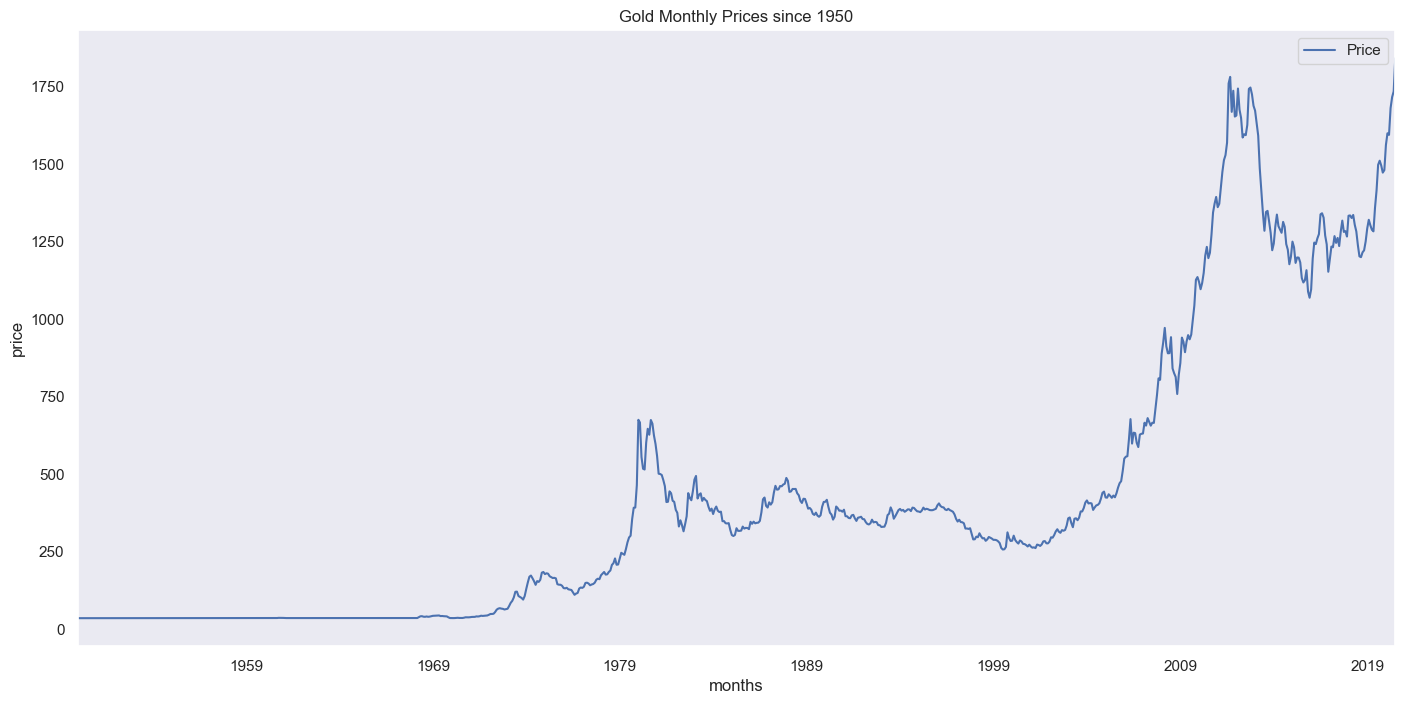

In [26]:
df.plot(figsize=(17, 8))
plt.title('Gold Monthly Prices since 1950')
plt.xlabel('months')
plt.ylabel('price')
plt.grid();

In [27]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


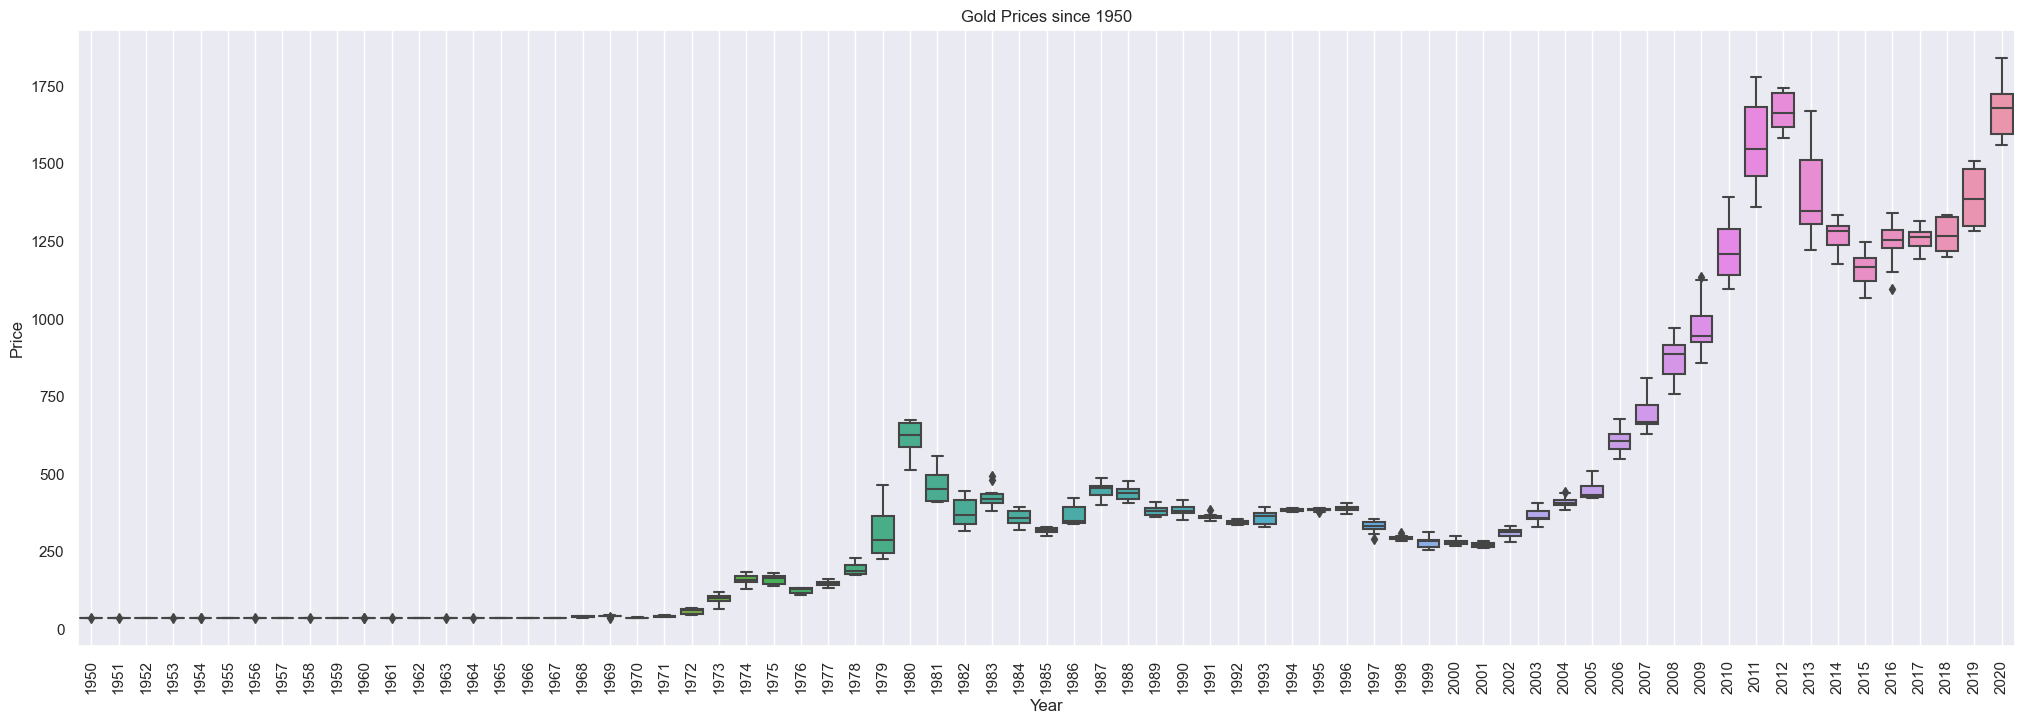

In [29]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y = df.values[:,0], ax=ax)
plt.title('Gold Prices since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()

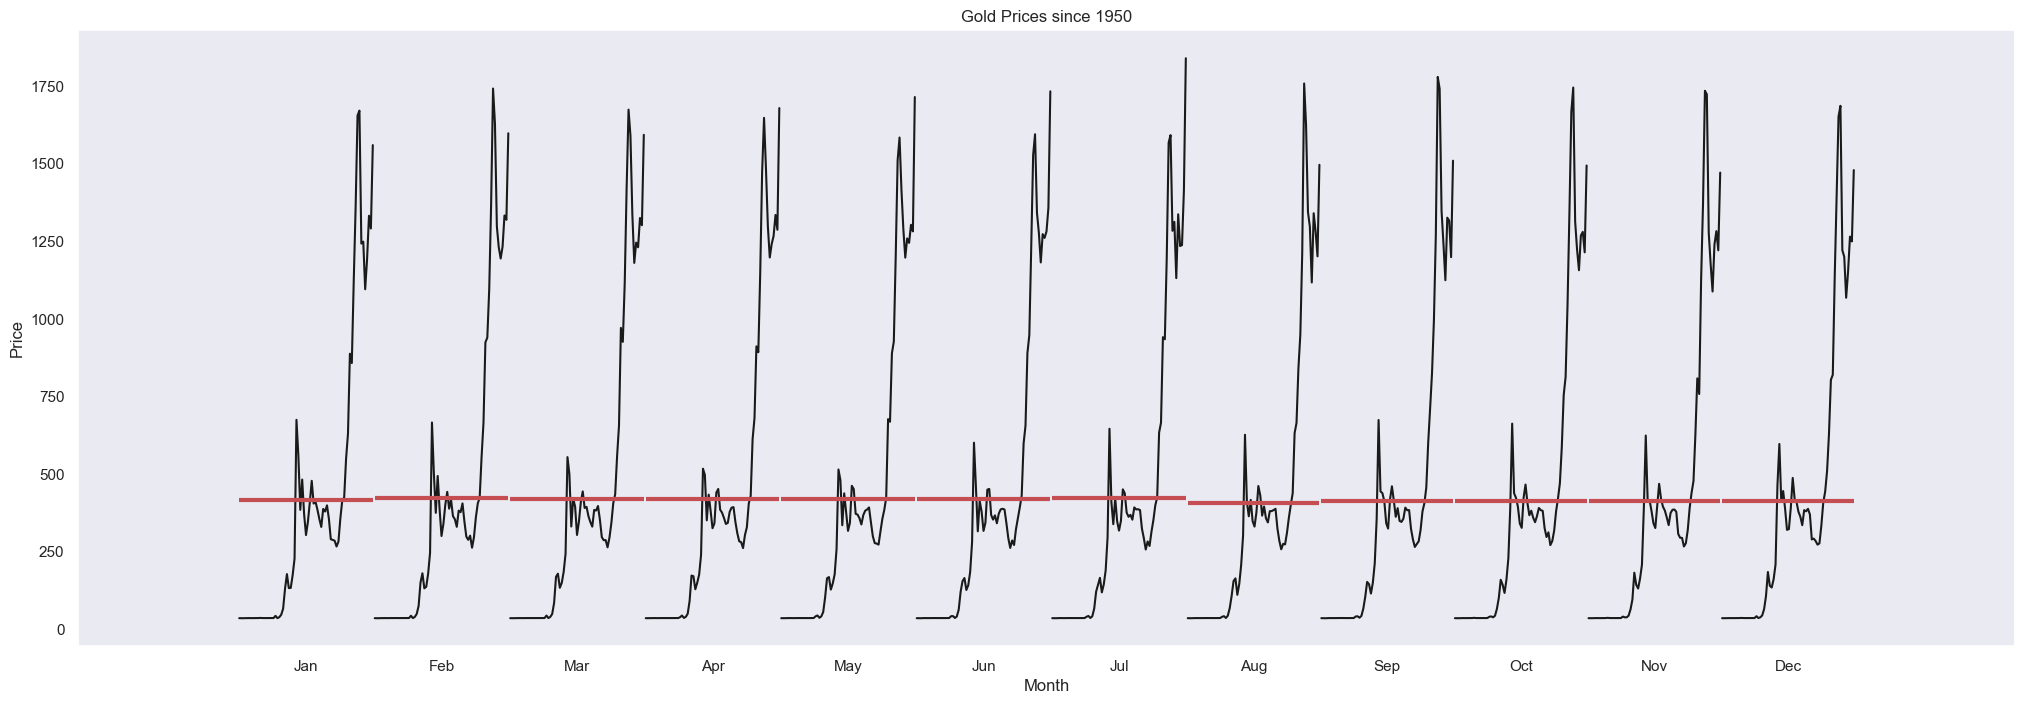

In [31]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(25,8))
month_plot(df,ylabel= 'Gold Price', ax=ax)
plt.title('Gold Prices since 1950')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

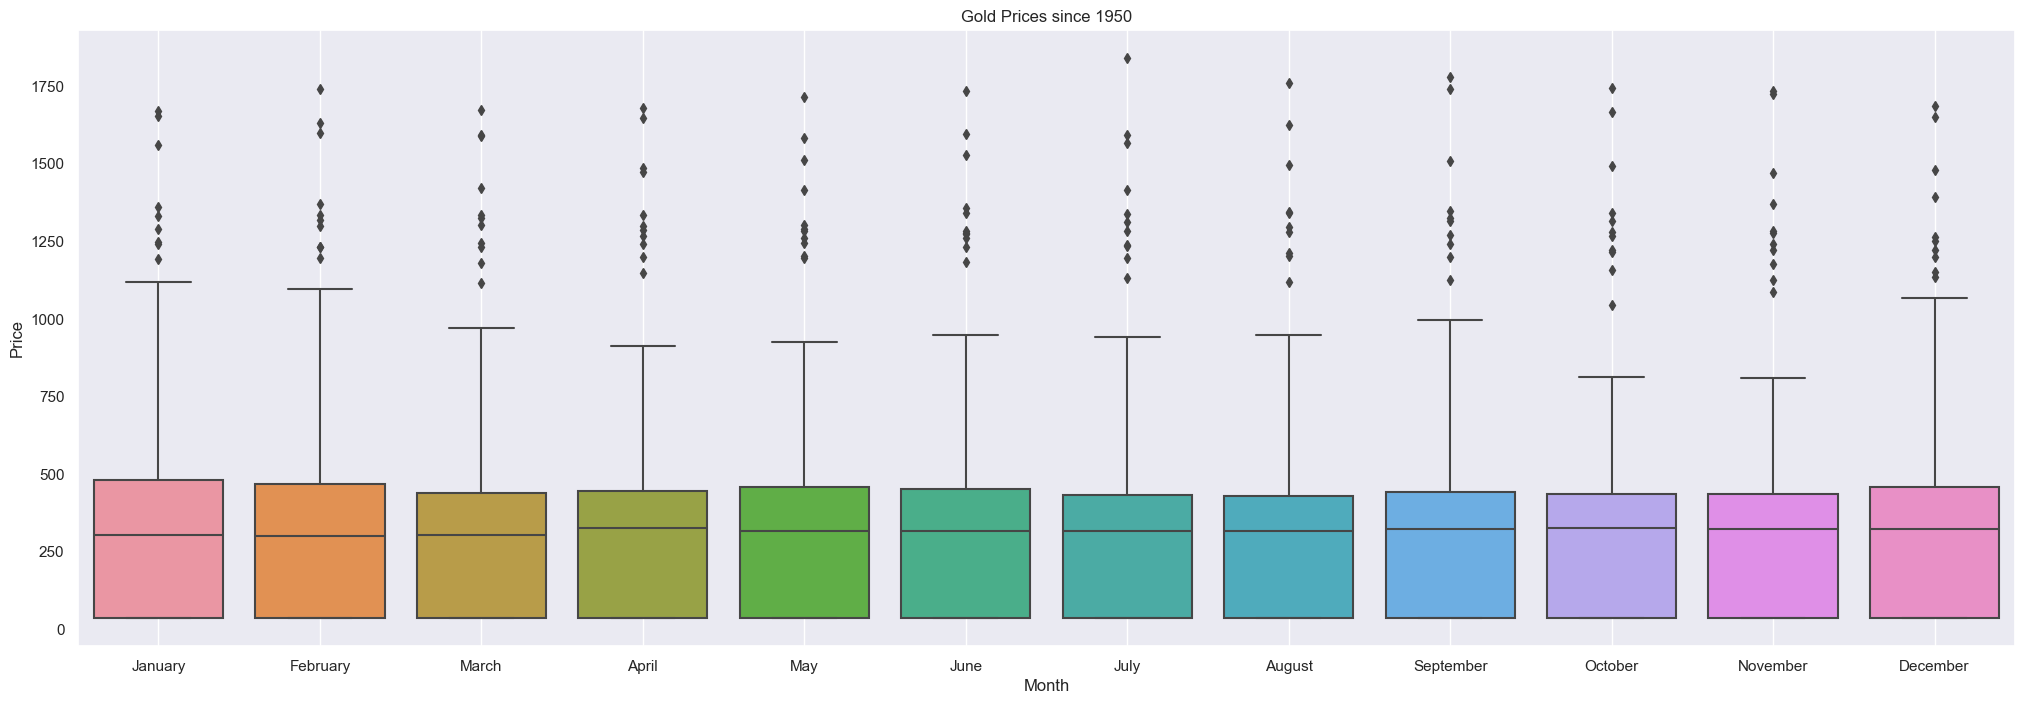

In [32]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.month_name(), y=df.values[:,0], ax=ax)
plt.title('Gold Prices since 1950')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

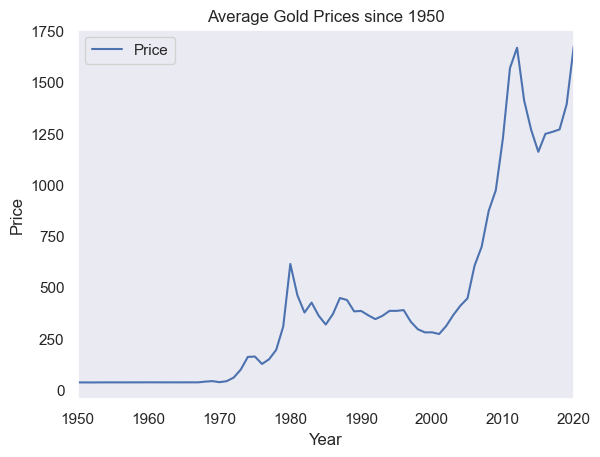

In [33]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Average Gold Prices since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

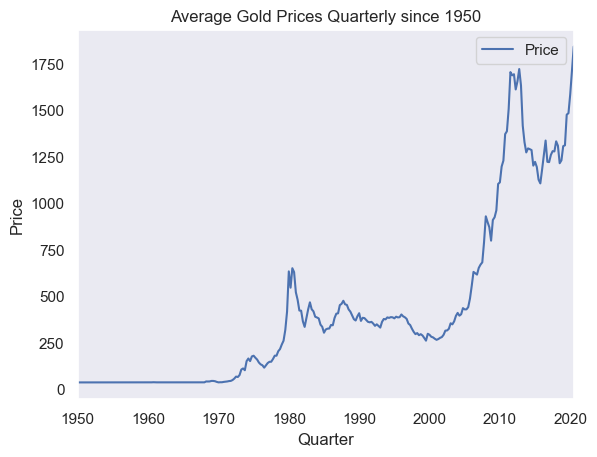

In [36]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Average Gold Prices Quarterly since 1950')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid();

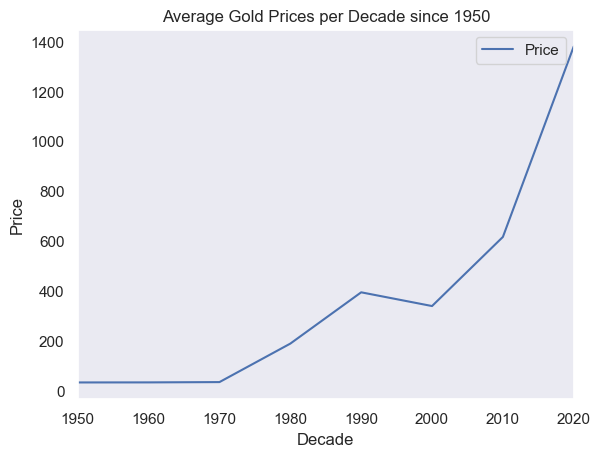

In [37]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title('Average Gold Prices per Decade since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()

In [41]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std']/df_1["Mean"])*100).round(2)
df_1

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
...,...,...,...
2016,1248.161833,73.454098,5.88
2017,1257.848583,32.529524,2.59
2018,1269.852583,54.900304,4.32


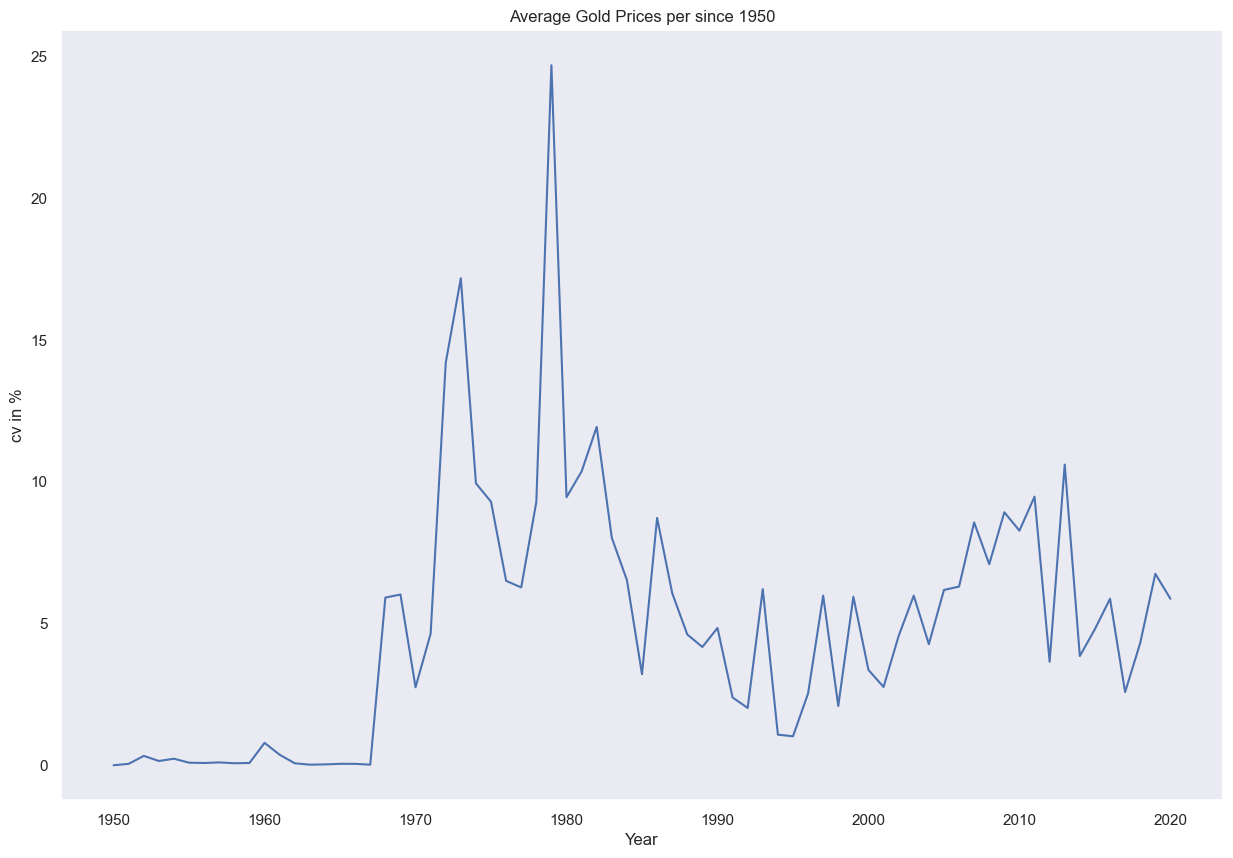

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title('Average Gold Prices per since 1950')
plt.xlabel('Year')
plt.ylabel('cv in %')
plt.grid()

In [43]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [44]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


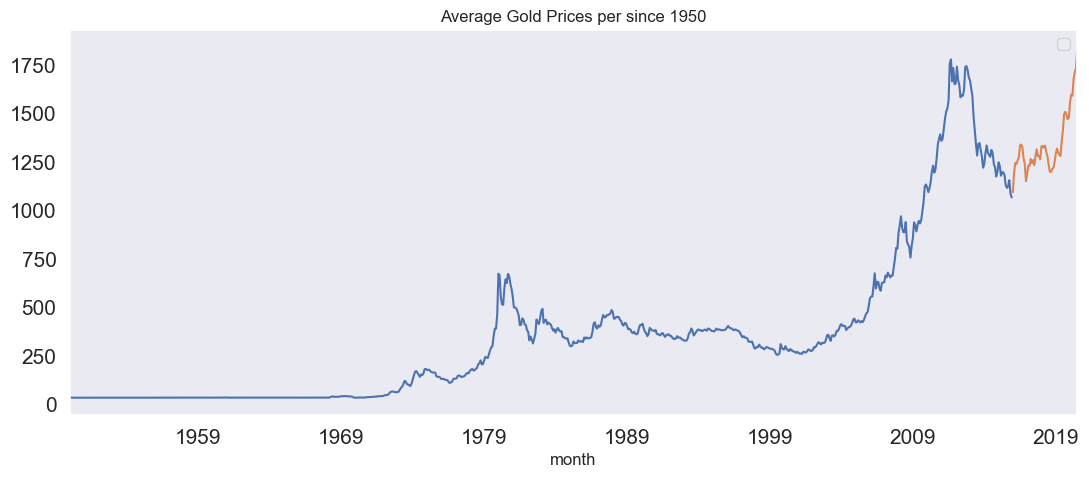

In [45]:
train["Price"].plot(figsize=(13,5), fontsize=15)
test["Price"].plot(figsize=(13,5), fontsize=15)
plt.title('Average Gold Prices per since 1950')
plt.grid()
plt.legend('Training Data', 'Test Data')
plt.show()

In [47]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [57]:
LR_train = train.copy()
LR_test = test.copy()

In [58]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

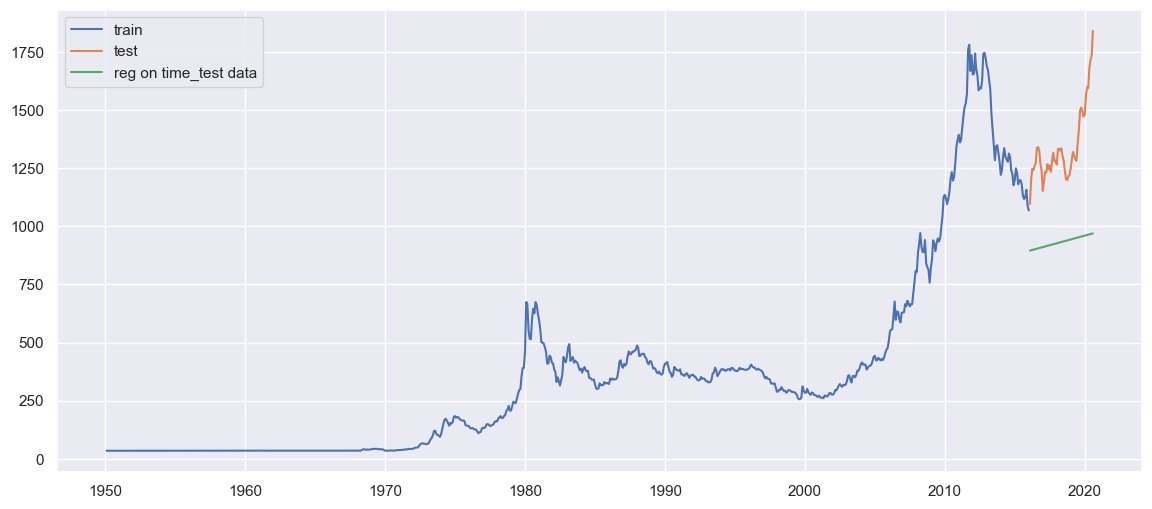

In [68]:
test_prediction_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_prediction_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid

In [74]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/actual))*100, 2)

In [75]:
mape_model1_test = mape(test['Price'].values, test_prediction_model1)
print("MAPE is %3.3f"%(mape_model1_test), "%")

MAPE is 29.760 %


In [80]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index=["RegressionTiem"])
results

,Test Mape (%)
RegressionTiem,29.76


In [84]:
Naive_train = train.copy()
Naive_test = test.copy()

In [85]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

Text(0.5, 1.0, 'Naive Forecast')

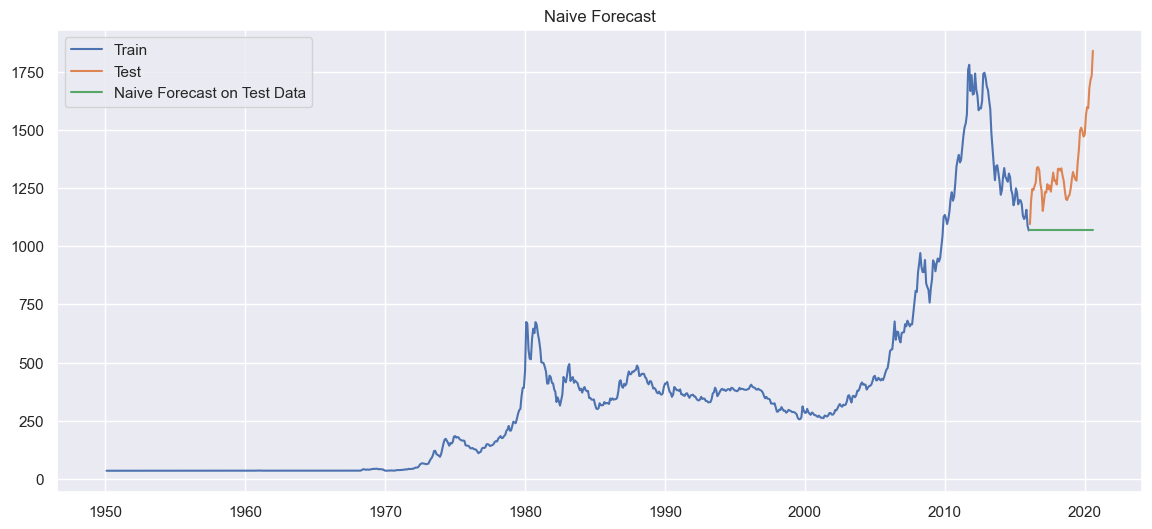

In [86]:
plt.figure(figsize=(14,6))
plt.plot(Naive_train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(Naive_test['naive'], label = 'Naive Forecast on Test Data')
plt.legend(loc = 'best')
plt.grid
plt.title('Naive Forecast')

In [87]:
mape_model2_test = mape(test['Price'].values, Naive_test['naive'].values)
print("For Naive forecast on the Test Data, MAPE is %3.3f"%(mape_model2_test), "%")

For Naive forecast on the Test Data, MAPE is 19.380 %


In [88]:
resultsDF_2 = pd.DataFrame({'Test Mape (%)': [mape_model2_test]}, index=["NaiveModel"])
results = pd.concat([results,resultsDF_2])
results

,Test Mape (%)
RegressionTiem,29.76
NaiveModel,19.38


In [90]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

final_model = ExponentialSmoothing(df,
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)

In [93]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [106]:
predictions = final_model.forecast(steps=len(test))

In [107]:
pred_df = pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid,ddof=1),
                       'prediction': prediction,
                       'upper_CI': prediction + 1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


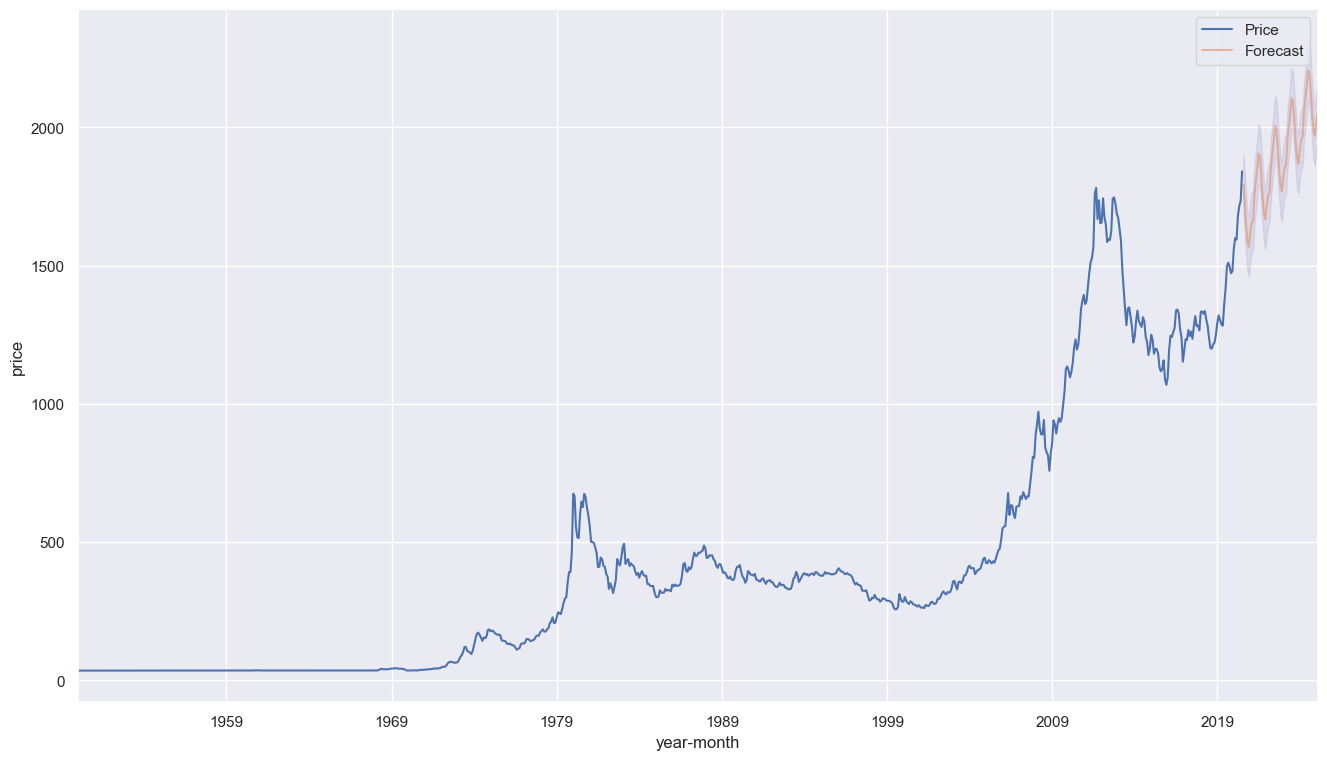

In [109]:
axis = df.plot(label = 'Actual', figsize=(16,9))
pred_df['prediction'].plot(ax= axis, label ='Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc= 'best')
plt.grid
plt.show()